# berryBoxImager

Code to process images taken in a controlled lightbox setting. These images will be used to measure phenotypic information on berries, including size, shape, and color.

Steps in the berry box imaging pipeline:
+ **Process images**
+ Measure phenotypes


## Process images

The image processing steps will include i) reading QR codes to determine the sample name and ii) color correction using a color card.


## Setup

Load packages, set directories, etc.


In [119]:
# Load packages
import cv2 as cv
import imageio
import numpy as np
from matplotlib import pyplot as plt
import os
from plantcv import plantcv as pcv
import shutil
from datetime import datetime
import time

# Project directory
proj_dir = os.getcwd()

# Directory containing example images
example_image_dir = os.path.join(proj_dir, "testPhotos")
# List the example images
example_images = os.listdir(example_image_dir)
example_images = [x for x in example_images if ".JPG" in x.upper()]

# Directory for storing renamed photos
renamed_image_dir = os.path.join(example_image_dir, "testPhotosRename")

# # Read in the color checker standard and convert to a matrix
# color_checker_standards_file = os.path.join(proj_dir, 'resources\\colorchecker_classicMini_rgb.csv')
# color_std_recarray = np.recfromcsv(color_checker_standards_file)
# target_matrix = color_std_recarray.astype([('square', '<f8'), ('red', '<f8'), ('green', '<f8'), ('blue', '<f8')]).view(np.ndarray)

# Read in the color checker standard and convert to a matrix
color_checker_standards_file = os.path.join(proj_dir, 'resources\\colorchecker_classicMini_bgr.csv')
color_std_recarray = np.recfromcsv(color_checker_standards_file)
target_matrix = color_std_recarray.astype([('square', '<f8'), ('blue', '<f8'), ('green', '<f8'), ('red', '<f8')]).view(np.ndarray)


### TESTING

List the images and load the first


DSC_0235.JPG


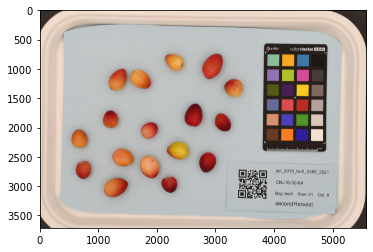

In [84]:
# Add full file path
file1 = os.path.join(example_image_dir, example_images[0])
# Print the basename
print(os.path.basename(file1))
# Record the current time
now = datetime.now().strftime("%Y%m%d_%H%M%S")

# Read in the image
img1 = imageio.imread(file1)

plt.figure()
plt.imshow(img1)
plt.show()

### Step 1: QR code reader

This step finds and decodes the QR code in the images

In [85]:
# Create an object of class QRCodeDetector
qrCodeDetector = cv.QRCodeDetector()

In [86]:
# Crop the image to speed detection

# Dimensions
img1_h, img1_w, img1_d = img1.shape
# Get the pixels of the lower-right quadrant
lr_h = int(0.5 * img1_h)
lr_w = int(0.5 * img1_w)

# img1_crop = img1[lr_h:img1_h, lr_w:img1_w,:]

# Crop and resize the image
img1_crop = pcv.transform.resize_factor(img1[lr_h:img1_h, lr_w:img1_w,:], (0.5, 0.5))

# # Print the image
# plt.figure()
# plt.imshow(img1_crop)
# plt.show()

# Detect and decode the QR code
decodedText, points, _ = qrCodeDetector.detectAndDecode(img1_crop)
# Print results
print(decodedText)

pyt_2018_lwr5_2466_2021


In [87]:
## Copy and rename the image
# Create a new filename using the decodedText and the date
file1_rename = decodedText + "_" + now + ".jpg"

# Copy the file
shutil.copyfile(src = file1, dst = os.path.join(renamed_image_dir, file1_rename))
# Message
print("File: " + os.path.basename(file1) + " has been copied to " + file1_rename + ".")

File: DSC_0235.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150128.jpg.


In [91]:
## Put it all together - loop over files

for file in example_images:
    
    # Add full file path
    file1 = os.path.join(example_image_dir, file)
    # Record the current time
    now = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Read in the image
    img1 = imageio.imread(file1)
    
    # Crop the image to speed detection

    # Dimensions
    img1_h, img1_w, img1_d = img1.shape
    # Get the pixels of the lower-right quadrant
    lr_h = int(0.5 * img1_h)
    lr_w = int(0.5 * img1_w)

    # img1_crop = img1[lr_h:img1_h, lr_w:img1_w,:]

    # Crop and resize the image
    img1_crop = pcv.transform.resize_factor(img1[lr_h:img1_h, lr_w:img1_w,:], (0.5, 0.5))

    # # Print the image
    # plt.figure()
    # plt.imshow(img1_crop)
    # plt.show()

    # Detect and decode the QR code
    decodedText, points, _ = qrCodeDetector.detectAndDecode(img1_crop)
    
    ## Copy and rename the image
    # Create a new filename using the decodedText and the date
    file1_rename = decodedText + "_" + now + ".jpg"

    # Copy the file
    shutil.copyfile(src = file1, dst = os.path.join(renamed_image_dir, file1_rename))
    # Message
    print("File: " + os.path.basename(file1) + " has been copied to " + file1_rename + ".")
    
    # Sleep
    time.sleep(1)
    



File: DSC_0235.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150531.jpg.
File: DSC_0236.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150533.jpg.
File: DSC_0237.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150535.jpg.
File: DSC_0238.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150537.jpg.
File: DSC_0239.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150539.jpg.
File: DSC_0240.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150541.jpg.
File: DSC_0241.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150543.jpg.
File: DSC_0242.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150545.jpg.
File: DSC_0243.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150548.jpg.
File: DSC_0244.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150550.jpg.
File: DSC_0245.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150552.jpg.
File: DSC_0246.JPG has been copied to pyt_2018_lwr5_2466_2021_20211115_150554.jpg.
File

ValueError: Could not find a format to read the specified file in single-image mode

## Color Calibration

This step performs color calibration of the images

SKIP THIS FOR NOW

In [100]:
# Use the plant CV Color Correction Workflow

# Add full file path
file1 = os.path.join(example_image_dir, example_images[0])
# Print the basename
print(os.path.basename(file1))

# Read in the image
img1 = imageio.imread(file1)

# plt.imshow(img1)
# plt.show()

# # Resize the image
# img1_resize = pcv.transform.resize_factor(img1, (0.5, 0.5))

# Find the color card in the image
dataframe1, start, space = pcv.transform.find_color_card(rgb_img = img1)
# Rescale the spacing
print(start)

# Use these outputs to create a labeled color card mask
mask = pcv.transform.create_color_card_mask(rgb_img = img1, radius = 5, start_coord = start, spacing = space, 
                                            ncols = 4, nrows = 6)


DSC_0235.JPG
(3956, 854)


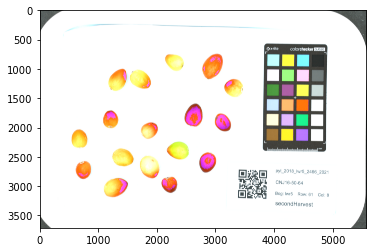

In [120]:
# Get the RGB matrix for the colors of the colorChecker in this image
headers, source_matrix = pcv.transform.get_color_matrix(img1, mask)

# print(source_matrix)
# print(target_matrix)

# Calculate a transformation matrix between the target matrix and this source matrix
matrix_a, matrix_m, matrix_b = pcv.transform.get_matrix_m(target_matrix = target_matrix, source_matrix = source_matrix)
deviance, transformation_matrix = pcv.transform.calc_transformation_matrix(matrix_m, matrix_b)


# Apply the transformation matrix
corrected_img = pcv.transform.apply_transformation_matrix(source_img = img1, target_img = img1,
                                                          transformation_matrix= transformation_matrix) #apply transformation
plt.imshow(corrected_img)
plt.show()



In [121]:
# Save the image
file1_new = file1.replace(".JPG", "_corrected.JPG")
imageio.imsave(file1_new, corrected_img)

DSC_0235.JPG


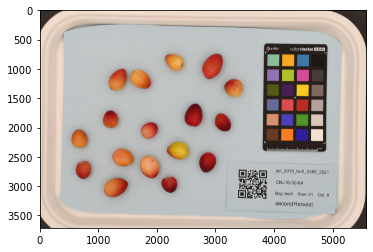

NameError: name 'img' is not defined

In [97]:








# # Calculate a transformation matrix between the target matrix and this source matrix
# matrix_a, matrix_m, matrix_b = pcv.transform.get_matrix_m(target_matrix = target_matrix, source_matrix = source_matrix)
# deviance, transformation_matrix = pcv.transform.calc_transformation_matrix(matrix_m, matrix_b)


# # Apply the transformation matrix
# corrected_img = pcv.transform.apply_transformation_matrix(source_img = img, target_img = img,
#                                                           transformation_matrix= transformation_matrix) #apply transformation


# plt.imshow(corrected_img)
# plt.show()



# # Read in the chart template
# template_img, template_path, template_filename = pcv.readimage(filename = chart_template_file)

# # Create a labeled color card mask, first use color card finder function 

# # This won't print anything out but you can look at the dataframe output 
# # to see the chips that the function found. 

# # Inputs:
# #   rgb_img - RGB image data containing color card 
# #   threshold - Optional threshold method; either 'adaptgauss' (default), 'normal', or 'otsu'
# #   threshvalue - Optional threhsolding value (default threshvalue = 125) 
# #   blurry - Optional boolean; False (default) or if True then image sharpening is applied 
# #   background - Optional type of image background; 'dark' (default) or 'light'
# dataframe1, start, space = pcv.transform.find_color_card(rgb_img=template_img)

# # Make the labeled mask of the target image 

# # Inputs: 
# #   rgb_img - RGB image data containing color card 
# #   radius - Radius of color card chips (masks make circles on chips)
# #   start_coord - Two-element tuple of the first chip mask, (starting x, starting y) 
# #   spacing - Two-element tuple of the horizontal and vertical spacing between chip masks
# #   nrows - Number of chip rows
# #   ncols - Number of chip columns 
# #   exclude - Optional list of chips to exclude. List largest to smallest index 
# target_mask = pcv.transform.create_color_card_mask(template_img, radius=10, start_coord=start, 
#                                                    spacing=space, nrows=6, ncols=4)



